In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import datetime

In [2]:
df = pd.read_csv('data/combined_tweets.csv')
users = df["user"].unique()

In [3]:
def get_engagements(df):
    viz_df = df.loc[df["has_viz"] == True]
    no_viz_df = df.loc[df["has_viz"] == False]
    
    viz_retweets = viz_df["retweets"].sum()
    viz_replies = viz_df["replies"].sum()
    viz_likes = viz_df["likes"].sum()
    viz_quotes = viz_df["quotes"].sum()
    
    no_viz_retweets = no_viz_df["retweets"].sum()
    no_viz_replies = no_viz_df["replies"].sum()
    no_viz_likes = no_viz_df["likes"].sum()
    no_viz_quotes = no_viz_df["quotes"].sum()
    
    viz_engagements = viz_retweets + viz_replies + viz_likes + viz_quotes
    no_viz_engagements = no_viz_retweets + no_viz_replies + no_viz_likes + no_viz_quotes
    
    total_engagements = viz_engagements + no_viz_engagements
    
    non_viz_tweets = len(no_viz_df)
    viz_tweets = len(viz_df)
    
    print("viz tweets:", viz_tweets)
    print("non viz tweets:", non_viz_tweets)
    
#     print("visualization tweet engagements: ", viz_engagements)
#     print("no visualization tweet engagements: ", no_viz_engagements)
#     print("total engagements: ", total_engagements)
    
    return viz_engagements, no_viz_engagements 

In [43]:
def get_tweets(df):
    viz_df = df.loc[df["has_viz"] == True]
    no_viz_df = df.loc[df["has_viz"] == False]
    
    non_viz_tweets = len(no_viz_df)
    viz_tweets = len(viz_df)
    
    return viz_tweets, non_viz_tweets

In [46]:
def show_eng_pie(disp_df, authorname):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'Viz Engagements', 'Non-Viz Engagements'
    viz_engagements, non_viz_engagements = get_engagements(disp_df)
    sizes = []
    sizes.append(viz_engagements)
    sizes.append(non_viz_engagements)
    
    #generate legend 
#     plt.legend(labels,loc=3)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title("Proportion of Engagements")

    return plt

In [47]:
def show_tweets_pie(disp_df, authorname):
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    labels = 'With Viz', 'Without Viz'
    viz_tweets, non_viz_tweets = get_tweets(disp_df)
    sizes = []
    sizes.append(viz_tweets)
    sizes.append(non_viz_tweets)
    
    #generate legend 
#     plt.legend(labels,loc=3)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title("Tweets with or without visualizations")

    return plt

In [51]:
def f(authors):
    disp_df = df.loc[df["user"] == authors]
    eng_pie = show_eng_pie(disp_df, authors)
    tweets_pie = show_tweets_pie(disp_df, authors)

interact(f, authors=users);

interactive(children=(Dropdown(description='authors', options=('abmakulec', 'aetiology', 'alicesim', 'AmeshAA'…

In [6]:
df.columns

Index(['tweet_id', 'user', 'text', 'date', 'retweets', 'replies', 'likes',
       'quotes', 'has_viz'],
      dtype='object')

In [37]:
test_df = df.loc[df['user'] == "aetiology"]
test_df.head()

,tweet_id,user,text,date,retweets,replies,likes,quotes,has_viz
234,1475309994925039619,aetiology,@buhleaddatplaya @Paminlaokay @4VSHAW @ChrisAl...,12/27/2021 03:38:07,0,0,2,0,False
235,1475292456153460738,aetiology,RT @syramadad: Increase in COVID-19 Pediatric ...,12/27/2021 02:28:25,617,0,0,0,False
236,1475229352107331592,aetiology,RT @ImmunoFever: To every single person out th...,12/26/2021 22:17:40,680,0,0,0,False
237,1475143004788867080,aetiology,"Again, this is why your vaccine status or your...",12/26/2021 16:34:33,200,20,529,12,False
238,1475142013804851208,aetiology,RT @CT_Bergstrom: Once again the old canard ab...,12/26/2021 16:30:37,186,0,0,0,False


In [38]:
test_df

,tweet_id,user,text,date,retweets,replies,likes,quotes,has_viz
234,1475309994925039619,aetiology,@buhleaddatplaya @Paminlaokay @4VSHAW @ChrisAl...,12/27/2021 03:38:07,0,0,2,0,False
235,1475292456153460738,aetiology,RT @syramadad: Increase in COVID-19 Pediatric ...,12/27/2021 02:28:25,617,0,0,0,False
236,1475229352107331592,aetiology,RT @ImmunoFever: To every single person out th...,12/26/2021 22:17:40,680,0,0,0,False
237,1475143004788867080,aetiology,"Again, this is why your vaccine status or your...",12/26/2021 16:34:33,200,20,529,12,False
238,1475142013804851208,aetiology,RT @CT_Bergstrom: Once again the old canard ab...,12/26/2021 16:30:37,186,0,0,0,False
...,...,...,...,...,...,...,...,...,...
310,1518697404458946560,aetiology,4/ ✅ PRE-test Poll 1️⃣ \n#BonumCE #COVID19\n🆓#...,04/25/2022 21:04:11,2,1,1,0,True
311,1518696439173369856,aetiology,🔥Last wk was just a 💪warm 🆙📰#COVID19 Vaccines ...,04/25/2022 21:00:21,4,1,20,1,False
312,1518662471099244546,aetiology,RT @DanielGriffinMD: US FDA expanded the appro...,04/25/2022 18:45:23,15,0,0,0,False
313,1518604337097805824,aetiology,RT @BrendanNyhan: Future generations will wond...,04/25/2022 14:54:22,47,0,0,0,False


In [33]:
test_df["date"] = test_df["date"].astype("datetime64")
# test_df = test_df.set_index("date")

<ipython-input-33-8aba5c8af71c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["date"] = test_df["date"].astype("datetime64")


In [34]:
test_df

,tweet_id,user,text,date,retweets,replies,likes,quotes,has_viz
0,1331672421636726791,abmakulec,@AlbertoCairo Clearly my brain operates on a s...,2020-11-25 18:53:41,0,1,1,0,False
1,1331629580558487552,abmakulec,@AlbertoCairo The vaccine misinformation being...,2020-11-25 16:03:27,0,1,4,0,False
2,1331616851319730180,abmakulec,@sanjaygreddy @FILWD @AlexKale17 @CGDev @RANDC...,2020-11-25 15:12:52,0,0,1,0,False
3,1331599424880058369,abmakulec,@FILWD @AlexKale17 @CGDev @RANDCorporation @bm...,2020-11-25 14:03:37,0,0,1,0,False
4,1331597345235083264,abmakulec,@FILWD @AlexKale17 @CGDev .@RANDCorporation ma...,2020-11-25 13:55:21,0,1,1,0,False
...,...,...,...,...,...,...,...,...,...
229,1517502102922317825,abmakulec,@alyssafowers Thanks for sharing your story Al...,2022-04-22 13:54:29,0,1,2,0,False
230,1517282735076880392,abmakulec,@blprnt Effective is an interesting word choic...,2022-04-21 23:22:48,0,1,4,0,False
231,1517106160951873538,abmakulec,The idea that the decision about approvals for...,2022-04-21 11:41:09,0,0,5,0,True
232,1516119017353887752,abmakulec,@sophiacbess @ImmunizeUnder5s @realLandsEnd @a...,2022-04-18 18:18:36,0,0,6,0,False


In [35]:
test_df["dt"],test_df["dt_m"] = test_df["date"].dt.year,test_df["date"].dt.month
test_df["comb_date"] = test_df.apply(lambda row: str(row["dt"])+"-"+str(row["dt_m"]),axis=1)
test_df

<ipython-input-35-24887166c3cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["dt"],test_df["dt_m"] = test_df["date"].dt.year,test_df["date"].dt.month
<ipython-input-35-24887166c3cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["comb_date"] = test_df.apply(lambda row: str(row["dt"])+"-"+str(row["dt_m"]),axis=1)


,tweet_id,user,text,date,retweets,replies,likes,quotes,has_viz,dt,dt_m,comb_date
0,1331672421636726791,abmakulec,@AlbertoCairo Clearly my brain operates on a s...,2020-11-25 18:53:41,0,1,1,0,False,2020,11,2020-11
1,1331629580558487552,abmakulec,@AlbertoCairo The vaccine misinformation being...,2020-11-25 16:03:27,0,1,4,0,False,2020,11,2020-11
2,1331616851319730180,abmakulec,@sanjaygreddy @FILWD @AlexKale17 @CGDev @RANDC...,2020-11-25 15:12:52,0,0,1,0,False,2020,11,2020-11
3,1331599424880058369,abmakulec,@FILWD @AlexKale17 @CGDev @RANDCorporation @bm...,2020-11-25 14:03:37,0,0,1,0,False,2020,11,2020-11
4,1331597345235083264,abmakulec,@FILWD @AlexKale17 @CGDev .@RANDCorporation ma...,2020-11-25 13:55:21,0,1,1,0,False,2020,11,2020-11
...,...,...,...,...,...,...,...,...,...,...,...,...
229,1517502102922317825,abmakulec,@alyssafowers Thanks for sharing your story Al...,2022-04-22 13:54:29,0,1,2,0,False,2022,4,2022-4
230,1517282735076880392,abmakulec,@blprnt Effective is an interesting word choic...,2022-04-21 23:22:48,0,1,4,0,False,2022,4,2022-4
231,1517106160951873538,abmakulec,The idea that the decision about approvals for...,2022-04-21 11:41:09,0,0,5,0,True,2022,4,2022-4
232,1516119017353887752,abmakulec,@sophiacbess @ImmunizeUnder5s @realLandsEnd @a...,2022-04-18 18:18:36,0,0,6,0,False,2022,4,2022-4


In [36]:
test_df["comb_date"].unique()

array(['2020-11', '2020-12', '2021-1', '2021-2', '2021-3', '2021-4',
       '2021-5', '2021-6', '2021-7', '2021-8', '2021-9', '2021-10',
       '2021-11', '2021-12', '2022-1', '2022-2', '2022-3', '2022-4'],
      dtype=object)

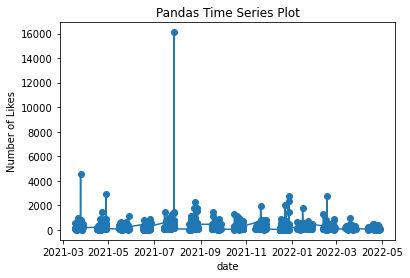

In [18]:
# Plot

plt.plot(test_df["likes"], marker='o')

# Labelling 

plt.xlabel("date")
plt.ylabel("Number of Likes")
plt.title("Pandas Time Series Plot")

# Display

plt.show()

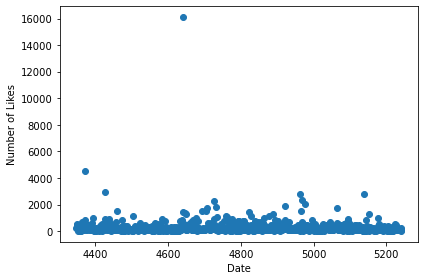

In [11]:
# Plot scatter

plt.scatter(test_df.index, test_df["likes"])

# Labelling 

plt.xlabel("Date")
plt.ylabel("Number of Likes")

# Auto space

plt.tight_layout()

# Display


plt.show()